<div align="center">
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ<br>
ІНСТИТУТ ПРИКЛАДНОГО СИСТЕМНОГО АНАЛІЗУ<br>
НАЦІОНАЛЬНОГО ТЕХНІЧНОГО УНІВЕРСИТЕТУ УКРАЇНИ<br>
«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ»<br>
КАФЕДРА МАТЕМАТИЧНИХ МЕТОДІВ СИСТЕМНОГО АНАЛІЗУ<br>
</div>
<br><br><br><br><br><br><br><br>
<div align="center"><strong>Звіт з виконання завдань</strong></div>
<div align="center"><strong>комп'ютерного практикуму №7</strong></div>
<div align="center">"Індексний метод"</div>
<div align="center">з кредитного модуля "Багатовимірний статистичний аналіз"</div>
<div align="center">Варіант 67</div>
<br><br><br><br>
<div align="right">
    <strong>Виконала:</strong><br>
    Студентка групи КА-02<br>
    Шапошнікова С. В.<br><br>
    <strong>Прийняла:</strong><br>
    Ірина Джигирей
</div>
<br><br><br><br><br><br><br>
<div align="center">Київ - 2022</div>


<hr>

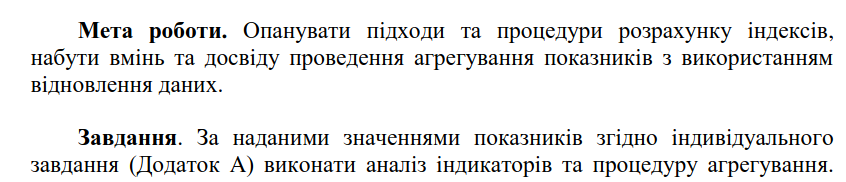

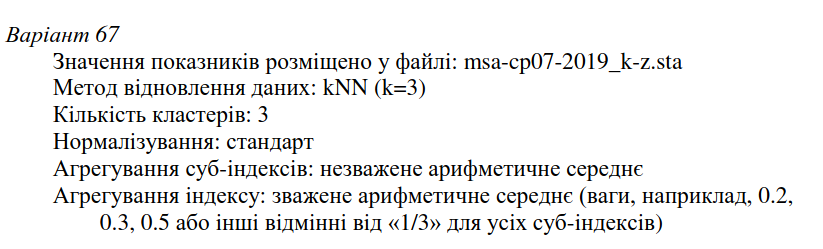

Підключимо небхідні бібліотеки:

In [50]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.impute import KNNImputer
# Підключимо функціонал для відновлення пропущених даних
from itertools import combinations
# Підключимо функціонал для кластеризування
from sklearn.cluster import KMeans

Завантажимо набір даних:

In [3]:
xls = pd.ExcelFile(r"msa-cp07-2019_k-z.xlsx")

In [106]:
#0 - це номер листа+1 таблиці xlsx, який плануємо зчитати
df = xls.parse(0)

In [107]:
df.columns = ["country","x1", "x2", "x3", "x4", "x5", "x6", "x7","x8","x9","x10"]
df = df.drop(0)
df = df.set_index(['country'])

In [108]:
# Виведемо перші 10 рядків таблиці
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
country,,,,,,,,,,
KAZ,8820,5.042002,99.989582,4.8,73.18,81.87762,29.721146,10.882061,1.7,11.456938
KEN,1830,0.271346,35.313549,5.01,66.699,22.565119,4.592516,10.190814,68.08,0.423784
KGZ,1240,4.881094,104.407217,6.918,71.6,51,6.738478,6.7122,27.88,1.556643
KHM,1530,17.426618,60.055275,0.147,69.823,NaN,1.194022,21.957852,53.36,0.981407
KOR,33830,17.680272,NaN,3.75,83.226829,96.157579,32.404435,13.97541,3.36,11.799325
KWT,36200,12.160061,NaN,2.167,75.489,99.542676,0.902769,0.448934,0.06,22.022416
LAO,2540,NaN,93.9631,0.852,67.923,30.84,20.609464,5.613518,48.43,2.609682
LBN,7280,-23.827189,143.943049,11.35,78.93,80.9,3.890919,13.225806,5.46,4.076894
LBR,610,NaN,43.710818,3.015,64.104,22,NaN,5.19103,87.24,0.238993


In [109]:
df.shape

(79, 10)

# Завдання 1
Відновити дані з використанням методу kNN (згідно з варіантом, k=3)

In [110]:
imputer = KNNImputer(n_neighbors=3)
df_imp = imputer.fit_transform(df)

In [111]:
df[df.columns] = df_imp

Отримали такий набір даних:

In [112]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
country,,,,,,,,,,
KAZ,8820.0,5.042002,99.989582,4.800,73.180000,81.877620,29.721146,10.882061,1.70,11.456938
KEN,1830.0,0.271346,35.313549,5.010,66.699000,22.565119,4.592516,10.190814,68.08,0.423784
KGZ,1240.0,4.881094,104.407217,6.918,71.600000,51.000000,6.738478,6.712200,27.88,1.556643
KHM,1530.0,17.426618,60.055275,0.147,69.823000,24.456967,1.194022,21.957852,53.36,0.981407
KOR,33830.0,17.680272,111.661918,3.750,83.226829,96.157579,32.404435,13.975410,3.36,11.799325
KWT,36200.0,12.160061,111.661918,2.167,75.489000,99.542676,0.902769,0.448934,0.06,22.022416
LAO,2540.0,4.338781,93.963100,0.852,67.923000,30.840000,20.609464,5.613518,48.43,2.609682
LBN,7280.0,-23.827189,143.943049,11.350,78.930000,80.900000,3.890919,13.225806,5.46,4.076894
LBR,610.0,1.852818,43.710818,3.015,64.104000,22.000000,4.424000,5.191030,87.24,0.238993


Збережемо отриману таблицю з даними:

In [113]:
df.to_csv("imputed_data.csv", index=True)

# Завдання 2
Для отриманих повних даних необхідно виконати кореляційний аналіз з отриманням кореляційної таблиці для усіх
десяти змінних.

Отримаємо гістограми та діаграми розсіювання:

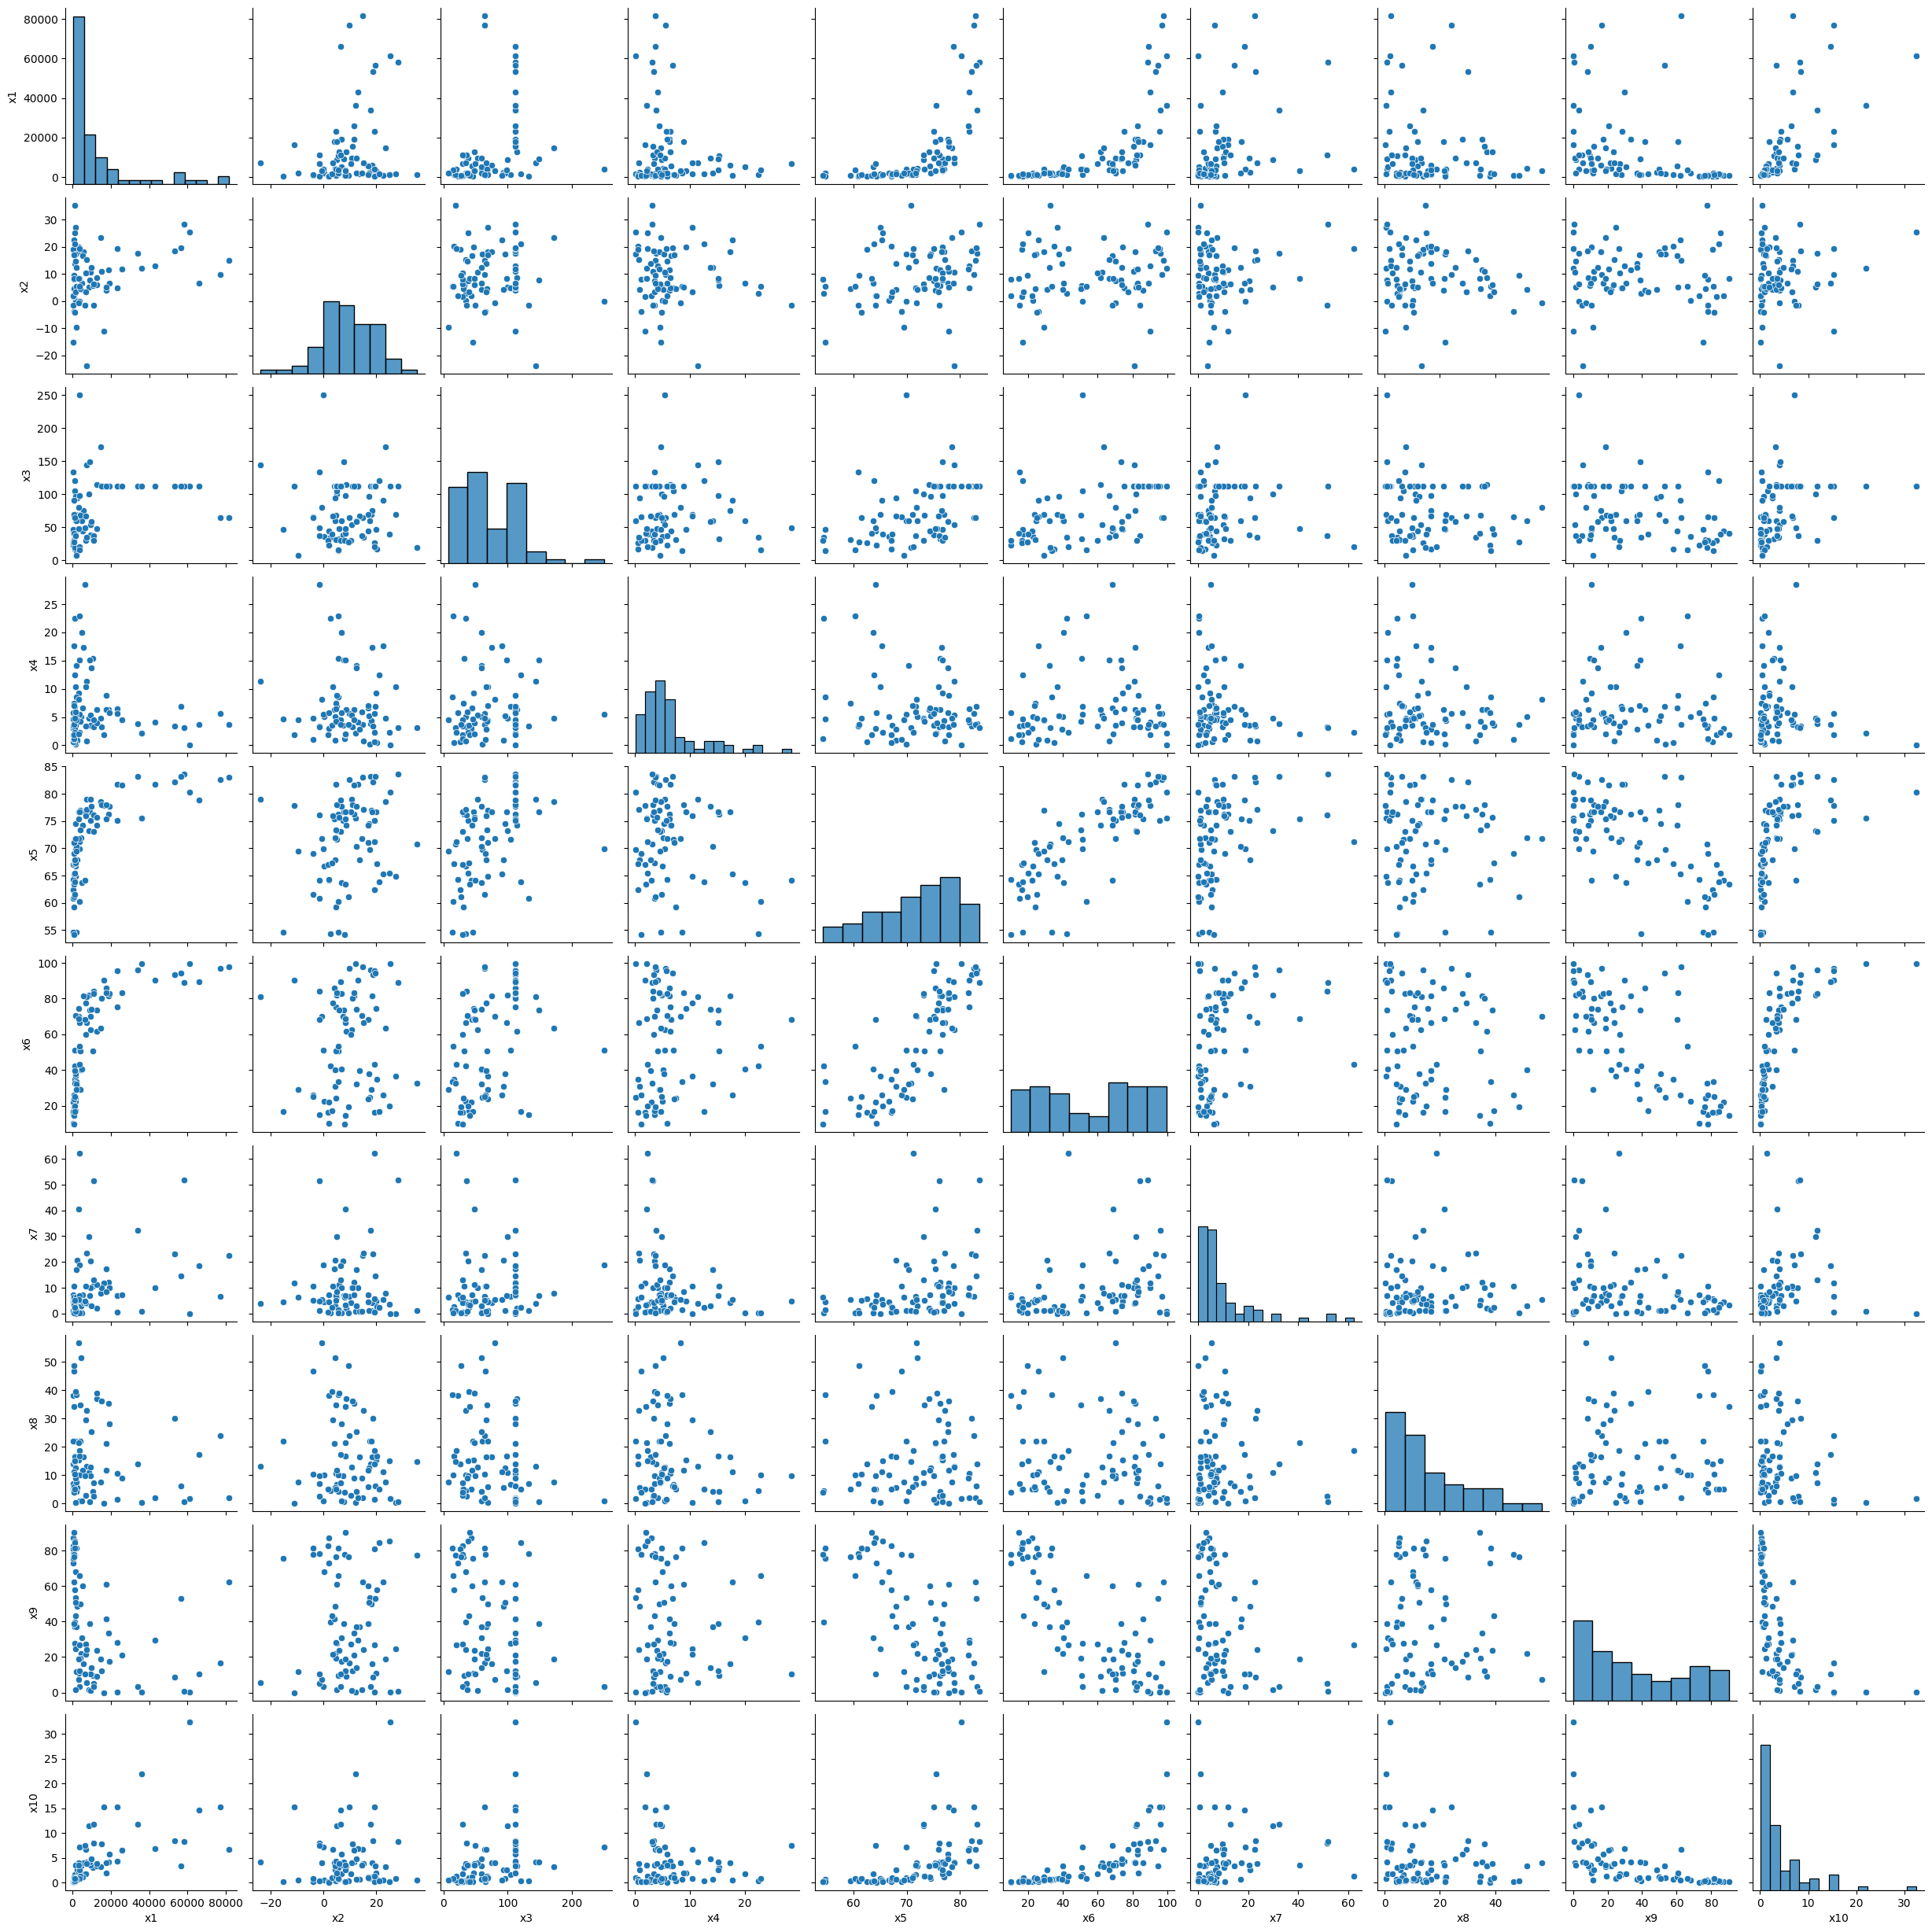

In [114]:
sns.pairplot(df)

Креляційна матриця:

<AxesSubplot: >

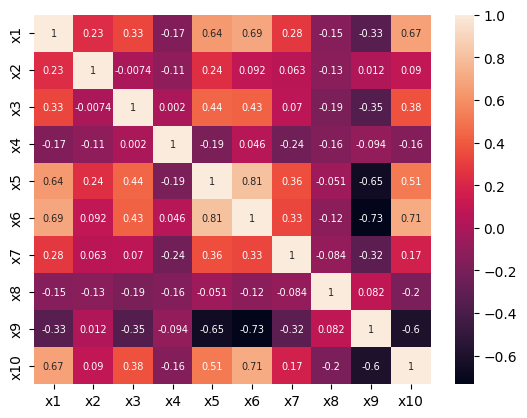

In [115]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7})

Бачимо, що наприклад змінні х8 та х9 - сильно корельовані. 

Збережемо таблицю з даними:

In [116]:
df.corr().to_csv("imputed_data_corr.csv", index=True)

# Завдання 3
Виконати кластерний аналіз (метод k-середніх, значення k=3 згідно варіанту)

В електронний звіт додати описові статистики для кожного
кластера і перелік членів кожного кластеру.

In [117]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

Отримані центри кластерів:

In [118]:
centr = pd.DataFrame(kmeans.cluster_centers_)
centr.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7","x8","x9","10"]
centr

,x1,x2,x3,x4,x5,x6,x7,x8,x9,10
0,21919.166667,9.672238,116.682987,4.962833,78.214431,84.847214,10.420702,14.686473,19.753333,8.490212
1,3954.576271,8.232141,60.193009,7.212593,69.240023,44.777957,8.501990,17.023457,41.302203,2.296846
2,62086.250000,17.013128,99.805406,3.808750,81.892095,93.891877,18.367752,10.557148,22.648750,12.019523


Описові статистики:

In [119]:
centr.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,10
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,29319.997646,11.639169,92.227134,5.328059,76.448849,74.505683,12.430148,14.089026,27.901429,7.602194
std,29764.107529,4.709358,28.997449,1.731063,6.508202,26.139142,5.230843,3.274293,11.695359,4.921793
min,3954.576271,8.232141,60.193009,3.808750,69.240023,44.777957,8.501990,10.557148,19.753333,2.296846
25%,12936.871469,8.952189,79.999208,4.385792,73.727227,64.812585,9.461346,12.621811,21.201042,5.393529
50%,21919.166667,9.672238,99.805406,4.962833,78.214431,84.847214,10.420702,14.686473,22.648750,8.490212
75%,42002.708333,13.342683,108.244196,6.087713,80.053263,89.369545,14.394227,15.854965,31.975477,10.254867
max,62086.250000,17.013128,116.682987,7.212593,81.892095,93.891877,18.367752,17.023457,41.302203,12.019523


Виведемо результати кластеризації для кожного значення (країни) в таблиці:

In [120]:
pred = pd.DataFrame()
pred["country"] = pd.Series(df.index)
pred["labels"] = kmeans.labels_

In [121]:
pred

,country,labels
0,KAZ,1
1,KEN,1
2,KGZ,1
3,KHM,1
4,KOR,0
...,...,...
74,UZB,1
75,VNM,1
76,ZAF,1
77,ZMB,1


# Завдання 4
На основі отриманих повних даних для кожної змінної необхідно отримати
мінімальне, середнє і максимальне значення та стандартне відхилення 

In [122]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,12570.126582,9.340104,72.785147,6.526165,71.884446,55.837988,9.792504,16.013656,36.140000,4.222185
std,18756.960793,9.981330,43.082114,5.655619,7.512367,28.066439,12.116017,13.859914,28.728594,5.497007
min,490.000000,-23.827189,7.447935,0.100000,54.239000,9.800000,0.002504,0.251502,0.000000,0.077837
25%,1435.000000,4.338892,37.636831,3.270000,66.870000,29.000000,2.538369,5.222565,10.595000,0.665554
50%,4010.000000,8.263553,64.797380,4.800000,73.317000,61.729955,5.649708,11.915429,27.880000,2.609682
75%,13880.000000,17.057523,111.661918,7.251500,77.064000,81.497376,10.812083,22.064229,61.495000,5.227501
max,81670.000000,35.279821,250.506581,28.469999,83.595122,99.652804,62.246582,56.824301,90.220000,32.474469


# Завдання 5
Нормалізування даних на основі стандарту

In [123]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

Отримали стандартизовані дані:

In [124]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
country,,,,,,,,,,
KAZ,-0.201210,-0.433366,0.635490,-0.307163,0.173558,0.933714,1.655328,-0.372613,-1.206466,1.324536
KEN,-0.576253,-0.914378,-0.875329,-0.269794,-0.694665,-1.193079,-0.431925,-0.422806,1.118888,-0.695410
KGZ,-0.607909,-0.449590,0.738685,0.069725,-0.038106,-0.173478,-0.253676,-0.675393,-0.289356,-0.488006
KHM,-0.592349,0.815341,-0.297367,-1.135141,-0.276160,-1.125242,-0.714214,0.431617,0.603233,-0.593320
KOR,1.140682,0.840916,0.908154,-0.494005,1.519476,1.445756,1.878209,-0.148000,-1.148314,1.387220
...,...,...,...,...,...,...,...,...,...,...
UZB,-0.574107,0.525821,-0.837161,-0.120320,-0.021360,0.522156,-0.753177,-0.497982,-1.211020,-0.136695
VNM,-0.498454,-0.108546,-0.582045,-0.798291,0.470959,0.459821,2.545117,0.408861,-0.612691,-0.134357
ZAF,-0.316567,-1.091982,-0.555529,3.904799,-1.038686,0.443270,-0.406863,-0.444496,-0.898193,0.601517


# Завдання 6

Для отриманих нормалізованих даних необхідно виконати кластерний
аналіз.
В електронний звіт додати перелік членів кожного кластеру і
висновки щодо зміни складу кластерів порівняно з отриманими в п.3.

In [125]:
kmeans_norm = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

In [126]:
pred = pd.DataFrame()
pred["country"] = pd.Series(df.index)
pred["normalized_labels"] = kmeans_norm.labels_

In [127]:
pred

,country,normalized_labels
0,KAZ,0
1,KEN,1
2,KGZ,1
3,KHM,1
4,KOR,0
...,...,...
74,UZB,0
75,VNM,0
76,ZAF,0
77,ZMB,1


Збережемо таблицю з даними:

In [128]:
pred.to_csv("st_data_clust.csv", index=False)

Порівняємо з результатами до кластеризації:

In [129]:
pred["labels"] = kmeans.labels_

In [130]:
pred

,country,normalized_labels,labels
0,KAZ,0,1
1,KEN,1,1
2,KGZ,1,1
3,KHM,1,1
4,KOR,0,0
...,...,...,...
74,UZB,0,1
75,VNM,0,1
76,ZAF,0,1
77,ZMB,1,1


Результати не відрізняються

# Завдання 7

Виконати агрегування субіндексів Сi з врахуванням, що
 - С1 охоплює змінні x1, х2 x3, 
 - С2: x4, х5, х6, x7, 
 - С3: x8, х9, x10,
 - індекс I охоплює вказані три субіндекси

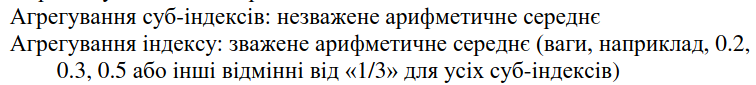

Для підрахунку незваженого середнього напишемо функцію:

In [145]:
def unweighted_average(distribution):
    return sum(distribution)/len(distribution)

In [146]:
df["C1"] = df.apply(lambda x: unweighted_average([x["x1"], x["x2"], x["x3"]]) ,axis=1)
df["C2"] = df.apply(lambda x: unweighted_average([x["x4"], x["x5"], x["x6"], x["x7"]]) ,axis=1)
df["C3"] = df.apply(lambda x: unweighted_average([x["x8"], x["x9"], x["x10"]]) ,axis=1)

Для підрахунку зваженого середнього напишемо функцію:

In [147]:
def weighted_average(distribution, weights):
  
    numerator = sum([distribution[i]*weights[i] for i in range(len(distribution))])
    denominator = sum(weights)
    
    return numerator/denominator

In [148]:
df["I"] = df.apply(lambda x: weighted_average([x["C1"], x["C2"], x["C3"]],[0.2, 0.3, 0.5]) ,axis=1)

In [149]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,C1,C2,C3,I
country,,,,,,,,,,,,,,
KAZ,-0.201210,-0.433366,0.635490,-0.307163,0.173558,0.933714,1.655328,-0.372613,-1.206466,1.324536,0.000305,0.613859,-0.084848,0.141795
KEN,-0.576253,-0.914378,-0.875329,-0.269794,-0.694665,-1.193079,-0.431925,-0.422806,1.118888,-0.695410,-0.788653,-0.647366,0.000224,-0.351828
KGZ,-0.607909,-0.449590,0.738685,0.069725,-0.038106,-0.173478,-0.253676,-0.675393,-0.289356,-0.488006,-0.106271,-0.098883,-0.484252,-0.293045
KHM,-0.592349,0.815341,-0.297367,-1.135141,-0.276160,-1.125242,-0.714214,0.431617,0.603233,-0.593320,-0.024792,-0.812689,0.147177,-0.175177
KOR,1.140682,0.840916,0.908154,-0.494005,1.519476,1.445756,1.878209,-0.148000,-1.148314,1.387220,0.963251,1.087359,0.030302,0.534009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZB,-0.574107,0.525821,-0.837161,-0.120320,-0.021360,0.522156,-0.753177,-0.497982,-1.211020,-0.136695,-0.295149,-0.093175,-0.615232,-0.394598
VNM,-0.498454,-0.108546,-0.582045,-0.798291,0.470959,0.459821,2.545117,0.408861,-0.612691,-0.134357,-0.396348,0.669401,-0.112729,0.065186
ZAF,-0.316567,-1.091982,-0.555529,3.904799,-1.038686,0.443270,-0.406863,-0.444496,-0.898193,0.601517,-0.654692,0.725630,-0.247057,-0.036778


# Завдання 8

Відсортувати об’єкти за спаданням значення індексу.

В електронний звіт додати перелік перших десяти і останніх
десяти позицій об’єктів за отриманими значеннями індексу

In [152]:
df = df.sort_values(by ="I", ascending=False)

Перші 10 значень:

In [153]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,C1,C2,C3,I
country,,,,,,,,,,,,,,
QAT,2.608124,1.617922,0.908154,-1.143505,1.117605,1.571086,-0.813184,-1.030066,-1.264617,5.172416,1.711400,0.183001,0.959244,0.876802
LUX,3.462836,0.035767,-0.199709,-0.166586,1.440731,1.480289,-0.267390,0.584751,-0.689759,2.029298,1.099631,0.621761,0.641430,0.727169
NLD,2.181573,0.933937,0.908154,-0.559845,1.370154,1.342882,1.099364,1.017727,-0.966854,0.771660,1.341221,0.813139,0.274178,0.649275
NOR,3.707499,0.559699,-0.199709,-0.504682,1.483534,1.511821,1.054786,-1.003271,0.918862,0.457714,1.355829,0.886365,0.124435,0.599293
USA,2.865128,-0.289388,0.908154,-0.508241,0.924804,1.204533,0.737610,0.089327,-0.900996,1.913406,1.161298,0.589677,0.367246,0.592785
KOR,1.140682,0.840916,0.908154,-0.494005,1.519476,1.445756,1.878209,-0.148000,-1.148314,1.387220,0.963251,1.087359,0.030302,0.534009
SGP,2.440723,1.914360,0.908154,-0.609669,1.568814,1.187284,3.489915,-1.105985,-1.236592,0.747861,1.754412,1.409086,-0.531572,0.507822
SWE,2.352730,1.046082,0.908154,0.054066,1.503792,1.386085,0.391100,-0.709917,0.586418,-0.149603,1.435655,0.833761,-0.091034,0.491742
LTU,0.348209,0.226137,0.908154,-0.047363,0.589240,0.923109,0.185817,1.402051,-0.091431,-0.004414,0.494167,0.412701,0.435402,0.440345


Останні 10 значень:

In [154]:
df.tail(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,C1,C2,C3,I
country,,,,,,,,,,,,,,
NAM,-0.397048,-0.270361,-0.306174,2.395468,-1.095353,-0.549981,-0.793716,-1.092219,-0.190919,-0.463279,-0.324528,-0.010895,-0.582139,-0.359244
MLI,-0.628298,-0.470683,-0.984993,0.162968,-1.685064,-1.134456,-0.358234,-0.781268,1.418753,-0.718700,-0.694658,-0.753696,-0.027072,-0.378576
PER,-0.307445,0.111956,-1.013852,-0.559845,0.649936,0.147464,-0.474911,-0.959678,-0.315979,-0.453414,-0.403114,-0.059339,-0.576357,-0.386603
UZB,-0.574107,0.525821,-0.837161,-0.120320,-0.021360,0.522156,-0.753177,-0.497982,-1.211020,-0.136695,-0.295149,-0.093175,-0.615232,-0.394598
SLE,-0.646003,-2.487849,-0.624849,-0.334032,-2.302640,-1.399801,-0.445923,0.430694,1.376716,-0.751907,-1.252901,-1.120599,0.351834,-0.410843
MRT,-0.582155,1.804414,-0.090734,0.688085,-0.932318,-0.686239,-0.812301,-1.134597,-0.400754,-0.613205,0.377175,-0.435693,-0.716185,-0.413366
MDG,-0.646540,-0.768412,-1.001775,-0.830855,-0.648849,-1.420120,-0.782966,-0.788361,1.633493,-0.745028,-0.805576,-0.920698,0.033368,-0.420640
LSO,-0.603080,-0.668334,-0.887661,2.831790,-2.351537,-0.485375,-0.792382,-0.832724,0.116653,-0.706665,-0.719692,-0.199376,-0.474245,-0.440874
TCD,-0.636882,-0.147421,-1.005553,-0.961467,-2.363862,-1.650803,-0.278322,-0.862919,1.459039,-0.747165,-0.596619,-1.313613,-0.050348,-0.538582


### Висновки


Під час виконання роботи було виконано відновлення даних методом KNN, проведено кореляційний аналіз отриманих даних, отримано кореляціну матрицю. Проведено кластерний аналіз методом к середніх для наданих даних та для нормалізованих. Також отримано описові статистики змінних: мінімальне, середнє і максимальне значення та стандартне відхилення  та інші. Виконано агрегування субіндексів. Об'єкти відсортовано за спаданням значення індексу.